# MODEL 1 - Setting Zipcode as dummie

## Model 1 using Linear Regression

# Data Cleaning & Standarization

## Importing data

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()),('pca', 
                  PCA(n_components=4)),('slr', LinearRegression())])
from sklearn.metrics import r2_score

In [2]:
df=pd.read_excel('regression_data.xls')
pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [4]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


## Checking Null Values

In [5]:
df.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [6]:
df.notnull().sum() # We haven't detected null values in any columns

id               21597
date             21597
bedrooms         21597
bathrooms        21597
sqft_living      21597
sqft_lot         21597
floors           21597
waterfront       21597
view             21597
condition        21597
grade            21597
sqft_above       21597
sqft_basement    21597
yr_built         21597
yr_renovated     21597
zipcode          21597
lat              21597
long             21597
sqft_living15    21597
sqft_lot15       21597
price            21597
dtype: int64

In [7]:
df.id.duplicated().sum() #checking how many duplicated ids(Houses) are there in the Data set

177

In [8]:
df.duplicated().sum() #Checking if there are duplicated rows. There are not any identical rows so the duplicated Ids may have some difference. 

0

In [9]:
df.loc[df.id.duplicated(),:].sort_values(by=['id']) # We check all the duplicated Ids in the Dataframe

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
2495,1000102,2015-04-22,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,300000
16801,7200179,2015-04-24,2,1.00,840,12750,1.0,0,0,3,6,840,0,1925,0,98055,47.4840,-122.211,1480,6969,175000
11422,109200390,2014-10-20,3,1.75,1480,3900,1.0,0,0,4,7,1480,0,1980,0,98023,47.2977,-122.367,1830,6956,250000
12406,123039336,2014-12-08,1,1.00,620,8261,1.0,0,0,3,5,620,0,1939,0,98106,47.5138,-122.364,1180,8244,244900
7786,251300110,2015-01-14,3,2.25,2510,12013,2.0,0,0,3,8,2510,0,1988,0,98003,47.3473,-122.314,1870,8017,358000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,9407110710,2015-02-26,3,1.75,1510,8400,1.0,0,0,2,7,980,530,1979,0,98045,47.4476,-121.771,1500,10125,322000
4918,9809000020,2015-03-13,5,2.25,3120,16672,2.0,0,0,4,9,3120,0,1969,0,98004,47.6458,-122.219,3740,17853,1940000
6340,9828200460,2015-01-06,2,1.00,700,4800,1.0,0,0,3,7,700,0,1922,0,98122,47.6147,-122.300,1440,4800,430000
15186,9834200305,2015-02-10,3,1.00,1790,3876,1.5,0,0,5,7,1090,700,1904,0,98144,47.5750,-122.288,1360,4080,615000


In [10]:
df.loc[df['id']==7853400250]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
20164,7853400250,2014-06-04,4,3.5,2910,5260,2.0,0,0,3,9,2910,0,2012,0,98065,47.5168,-121.883,2910,5260,610000
20165,7853400250,2015-02-19,4,3.5,2910,5260,2.0,0,0,3,9,2910,0,2012,0,98065,47.5168,-121.883,2910,5260,645000


In [11]:
df=df.sort_values('date')

In [12]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
7316,2202500290,2014-05-02,4,1.0,1450,8800,1.0,0,0,4,7,1450,0,1954,0,98006,47.5746,-122.135,1260,8942,435000
20586,7853361370,2014-05-02,4,2.5,3310,6500,2.0,0,0,3,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000,555000
1040,7197300105,2014-05-02,4,2.5,1940,10500,1.0,0,0,4,7,1140,800,1976,0,98052,47.6830,-122.114,2200,10500,550000
20543,3438501320,2014-05-02,2,2.5,1630,1368,2.0,0,0,3,7,1280,350,2009,0,98106,47.5489,-122.363,1590,2306,295000
9587,472000620,2014-05-02,3,2.5,2600,4750,1.0,0,0,4,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750,790000


In [13]:
df2 = df.drop('price', axis=1)

In [14]:
df2.duplicated().sum()

0

In [15]:
pd.set_option("display.max_rows", None)
df[df.duplicated(['id'], keep=False)].sort_values(by=['id'])

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
2495,1000102,2015-04-22,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,300000
2494,1000102,2014-09-16,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,280000
16800,7200179,2014-10-16,2,1.00,840,12750,1.0,0,0,3,6,840,0,1925,0,98055,47.4840,-122.211,1480,6969,150000
16801,7200179,2015-04-24,2,1.00,840,12750,1.0,0,0,3,6,840,0,1925,0,98055,47.4840,-122.211,1480,6969,175000
11421,109200390,2014-08-20,3,1.75,1480,3900,1.0,0,0,4,7,1480,0,1980,0,98023,47.2977,-122.367,1830,6956,245000
11422,109200390,2014-10-20,3,1.75,1480,3900,1.0,0,0,4,7,1480,0,1980,0,98023,47.2977,-122.367,1830,6956,250000
12406,123039336,2014-12-08,1,1.00,620,8261,1.0,0,0,3,5,620,0,1939,0,98106,47.5138,-122.364,1180,8244,244900
12405,123039336,2014-06-11,1,1.00,620,8261,1.0,0,0,3,5,620,0,1939,0,98106,47.5138,-122.364,1180,8244,148000
7785,251300110,2014-07-31,3,2.25,2510,12013,2.0,0,0,3,8,2510,0,1988,0,98003,47.3473,-122.314,1870,8017,225000
7786,251300110,2015-01-14,3,2.25,2510,12013,2.0,0,0,3,8,2510,0,1988,0,98003,47.3473,-122.314,1870,8017,358000


In [16]:
df_dupl=df[df.duplicated(['id','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade', 'sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15', 'sqft_lot15'], keep=False)].sort_values(by=['id'])


In [17]:
df=df.drop_duplicates( subset=['id','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade', 'sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15', 'sqft_lot15'],keep='last')

In [18]:
df.reset_index(drop=True, inplace=True)

In [19]:
df.info() # After checking the duplicate rows we decided to keep the rows with the last date. Besides price and date, there is no other id that has difference in it's  values.  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21420 non-null  int64         
 1   date           21420 non-null  datetime64[ns]
 2   bedrooms       21420 non-null  int64         
 3   bathrooms      21420 non-null  float64       
 4   sqft_living    21420 non-null  int64         
 5   sqft_lot       21420 non-null  int64         
 6   floors         21420 non-null  float64       
 7   waterfront     21420 non-null  int64         
 8   view           21420 non-null  int64         
 9   condition      21420 non-null  int64         
 10  grade          21420 non-null  int64         
 11  sqft_above     21420 non-null  int64         
 12  sqft_basement  21420 non-null  int64         
 13  yr_built       21420 non-null  int64         
 14  yr_renovated   21420 non-null  int64         
 15  zipcode        2142

In [20]:
df.loc[df['id']==1000102]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
20070,1000102,2015-04-22,6,3.0,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,300000


In [21]:
df.loc[df['id']==7200179]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
20227,7200179,2015-04-24,2,1.0,840,12750,1.0,0,0,3,6,840,0,1925,0,98055,47.484,-122.211,1480,6969,175000


In [22]:
df.loc[df['id']==109200390]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
10789,109200390,2014-10-20,3,1.75,1480,3900,1.0,0,0,4,7,1480,0,1980,0,98023,47.2977,-122.367,1830,6956,250000


# Pre-processing

## Checking data types

In [23]:
df['bathrooms']=df['bathrooms'].astype(int) # Python by default floors the integer

In [24]:
df['floors']=df['floors'].astype(int)

In [25]:
df.head(15)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2202500290,2014-05-02,4,1,1450,8800,1,0,0,4,7,1450,0,1954,0,98006,47.5746,-122.135,1260,8942,435000
1,7853361370,2014-05-02,4,2,3310,6500,2,0,0,3,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000,555000
2,7197300105,2014-05-02,4,2,1940,10500,1,0,0,4,7,1140,800,1976,0,98052,47.6830,-122.114,2200,10500,550000
3,3438501320,2014-05-02,2,2,1630,1368,2,0,0,3,7,1280,350,2009,0,98106,47.5489,-122.363,1590,2306,295000
4,472000620,2014-05-02,3,2,2600,4750,1,0,0,4,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750,790000
5,1024069009,2014-05-02,5,2,2820,67518,2,0,0,3,8,2820,0,1979,0,98029,47.5794,-122.025,2820,48351,675000
6,7305300695,2014-05-02,4,2,2820,8408,2,0,0,3,9,2820,0,2014,0,98155,47.7538,-122.325,1300,8408,625000
7,3221059036,2014-05-02,4,2,3630,42884,1,0,0,3,9,2300,1330,1979,0,98092,47.2617,-122.190,2830,80148,400000
8,7525000080,2014-05-02,3,1,2330,14892,1,0,0,3,8,1970,360,1980,0,98074,47.6267,-122.046,2570,14217,588500
9,7739100015,2014-05-02,3,1,1710,7320,1,0,0,3,7,1710,0,1948,0,98155,47.7512,-122.281,2260,8839,463000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21420 non-null  int64         
 1   date           21420 non-null  datetime64[ns]
 2   bedrooms       21420 non-null  int64         
 3   bathrooms      21420 non-null  int64         
 4   sqft_living    21420 non-null  int64         
 5   sqft_lot       21420 non-null  int64         
 6   floors         21420 non-null  int64         
 7   waterfront     21420 non-null  int64         
 8   view           21420 non-null  int64         
 9   condition      21420 non-null  int64         
 10  grade          21420 non-null  int64         
 11  sqft_above     21420 non-null  int64         
 12  sqft_basement  21420 non-null  int64         
 13  yr_built       21420 non-null  int64         
 14  yr_renovated   21420 non-null  int64         
 15  zipcode        2142

In [27]:
df=df.drop(['id'],axis=1)

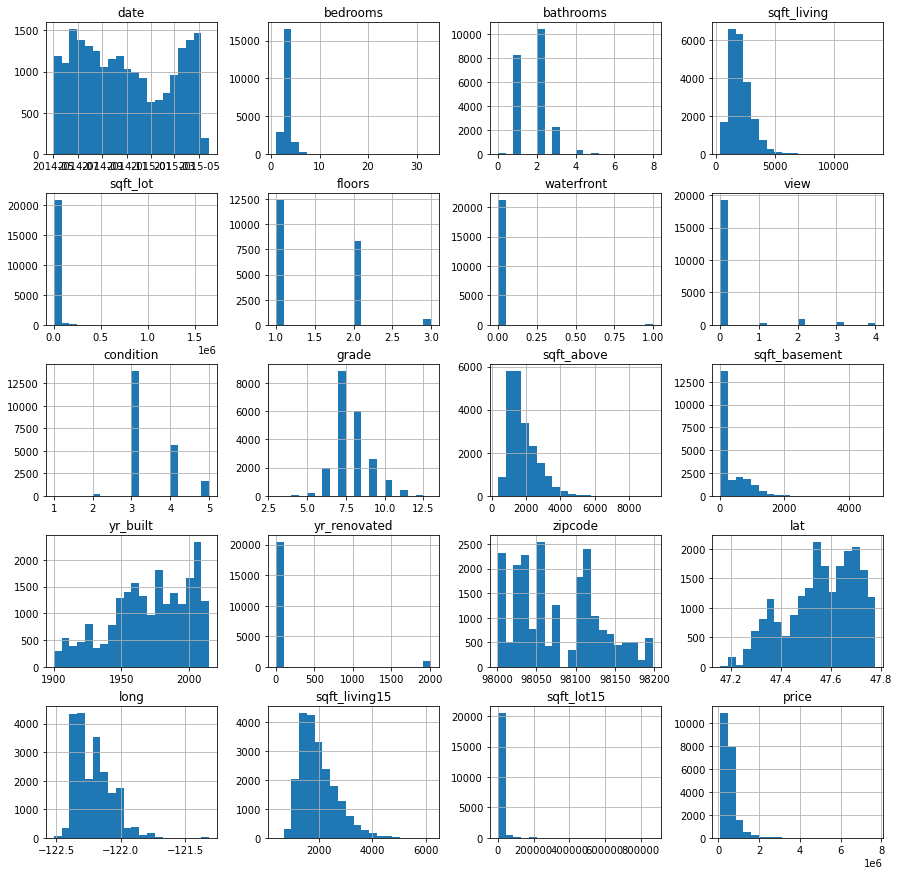

In [28]:
df.hist(figsize=(15,15),bins=20,layout=(5,4));

array([[<AxesSubplot:title={'center':'bedrooms'}>]], dtype=object)

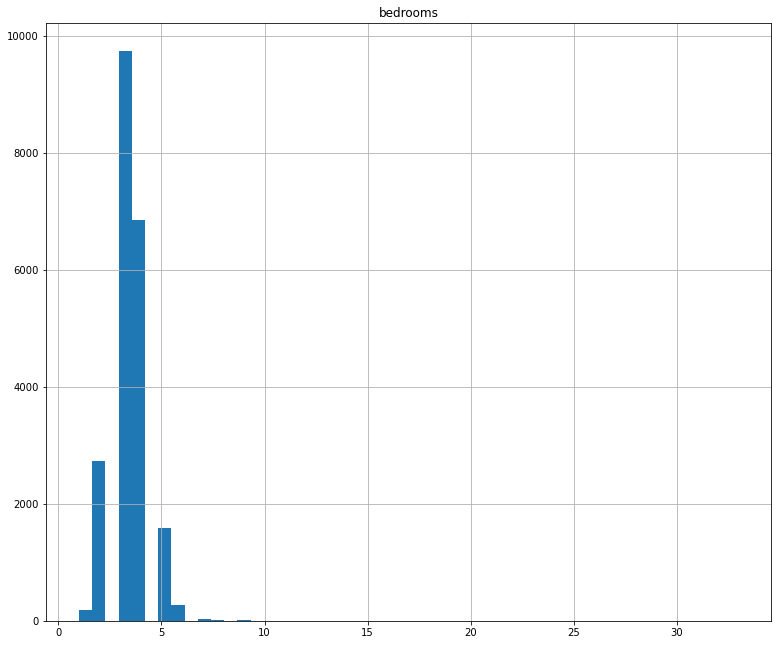

In [29]:
df.hist(['bedrooms'], figsize=(13,11),bins=50)

In [30]:
df['bedrooms'] = df['bedrooms'].replace(33,3)

In [31]:
df.drop(df.loc[df['bedrooms']==11].index, inplace=True)

In [32]:
df.reset_index(drop=True, inplace=True)

array([[<AxesSubplot:title={'center':'bedrooms'}>]], dtype=object)

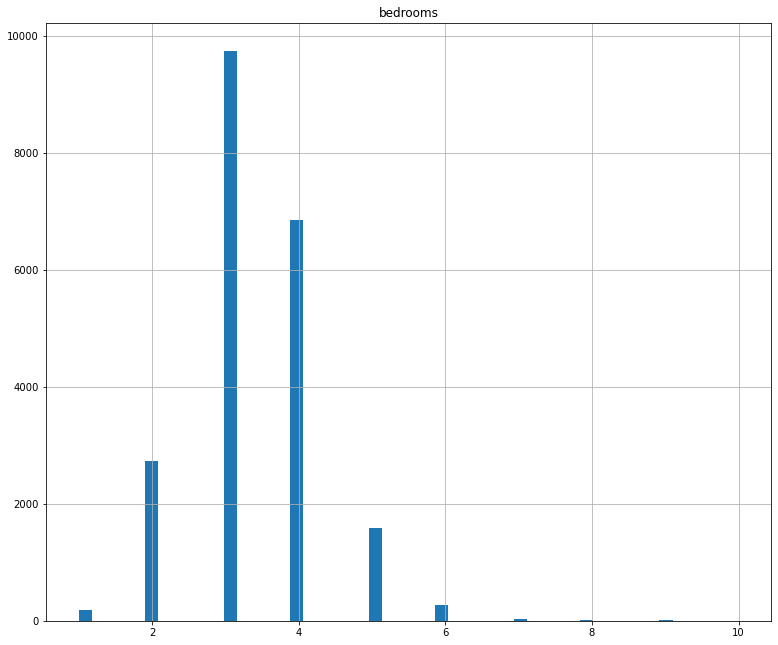

In [33]:
df.hist(['bedrooms'], figsize=(13,11),bins=50)

array([[<AxesSubplot:title={'center':'sqft_lot'}>]], dtype=object)

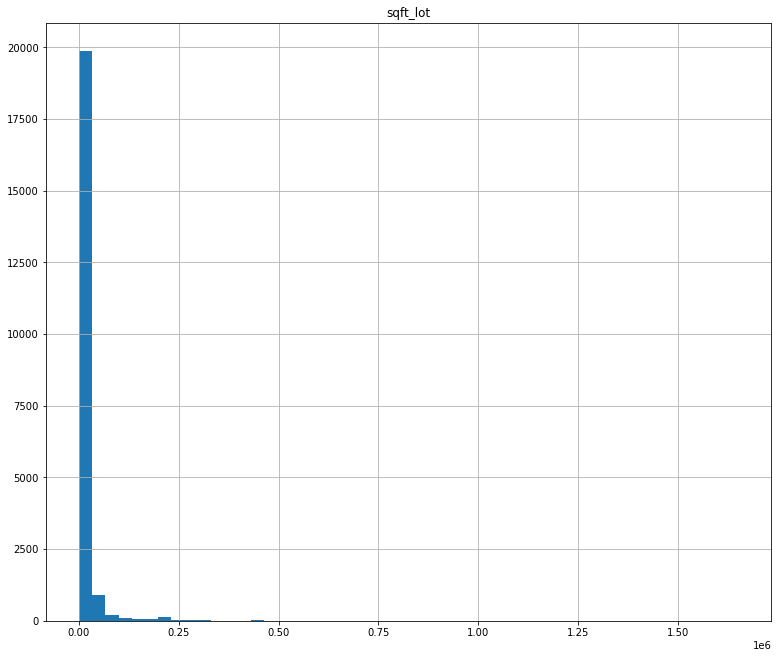

In [34]:
df.hist(['sqft_lot'], figsize=(13,11),bins=50)

array([[<AxesSubplot:title={'center':'floors'}>]], dtype=object)

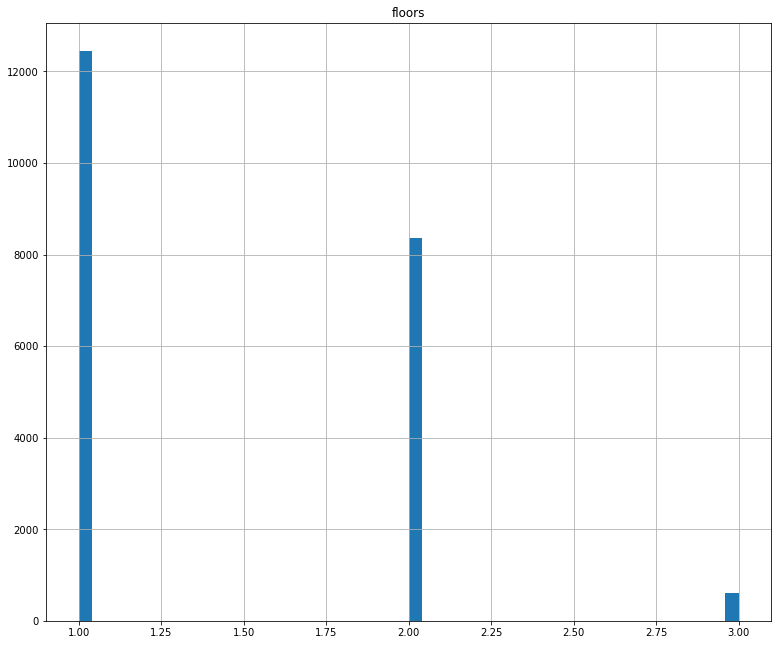

In [35]:
df.hist(['floors'], figsize=(13,11),bins=50)

In [36]:
df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21419.000000,21419.000000,21419.000000,2.141900e+04,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,2.141900e+04
mean,3.372193,1.752556,2083.089827,1.512851e+04,1.447967,0.007610,0.235118,3.410803,7.662823,1791.141790,291.948037,1971.095476,84.703721,98077.873057,47.560197,-122.213777,1988.410617,12776.083057,5.418624e+05
std,0.901511,0.733983,918.808501,4.153171e+04,0.552110,0.086905,0.767182,0.650044,1.171990,828.701868,442.880839,29.385587,402.371481,53.478383,0.138593,0.140790,685.542059,27346.208089,3.675655e+05
min,1.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,3.000000,1.000000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000,3.249500e+05
50%,3.000000,2.000000,1920.000000,7.614000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572100,-122.230000,1840.000000,7620.000000,4.505000e+05
75%,4.000000,2.000000,2550.000000,1.069200e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1997.000000,0.000000,98117.000000,47.678100,-122.125000,2370.000000,10086.500000,6.450000e+05
max,10.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [37]:
df.sort_values(by=['bedrooms']).tail(10) 
# After checking visually, statistically and logically we assume that the maximun value of bedrooms is an outlier 
# and we think that's a typo since the price, the number of bathrooms is not coherent with so many bedrooms. 
# Probably we thought it is a 3 bedroom house instead of 33.

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
13293,2014-12-04,8,5,2800,2580,2,0,0,3,8,1880,920,1997,0,98122,47.6086,-122.303,1800,2580,490000
17569,2015-03-17,9,4,4620,5508,2,0,0,3,11,3870,750,1915,0,98105,47.6684,-122.309,2710,4320,1400000
6628,2014-08-11,9,7,4050,6504,2,0,0,3,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866,450000
6569,2014-08-08,9,4,3650,5000,2,0,0,3,8,2530,1120,1915,2010,98105,47.6604,-122.289,2510,5000,1280000
17329,2015-03-13,9,3,2820,4480,2,0,0,3,7,1880,940,1918,0,98105,47.6654,-122.307,2460,4400,934000
255,2014-05-07,9,4,3830,6988,2,0,0,3,7,2450,1380,1938,0,98103,47.6927,-122.338,1460,6291,599999
14559,2015-01-06,9,3,3680,4400,2,0,0,3,7,2830,850,1908,0,98102,47.6374,-122.324,1960,2450,700000
14344,2014-12-29,10,3,2920,3745,2,0,0,4,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745,660000
11408,2014-10-29,10,2,3610,11914,2,0,0,4,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914,650000
6942,2014-08-14,10,5,4590,10920,1,0,2,3,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400,1150000


In [38]:
df.sort_values(by=['bathrooms']).tail(10) 

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
2454,2014-06-11,5,6,8670,64033,2,0,4,3,13,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021,2890000
19348,2015-04-13,6,6,7390,24829,2,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619,5300000
4034,2014-07-02,5,6,8020,21738,2,0,0,3,11,8020,0,2001,0,98006,47.5675,-122.189,4160,18969,3300000
10111,2014-10-07,8,6,4340,9415,2,0,0,3,8,4340,0,1967,0,98004,47.6316,-122.202,2050,9100,2150000
10108,2014-10-07,7,6,7480,41664,2,0,2,3,11,5080,2400,1953,0,98166,47.4643,-122.368,2810,33190,800000
10368,2014-10-11,5,6,5490,19897,2,0,0,3,12,5490,0,2005,0,98039,47.6165,-122.236,2910,17600,3640000
6628,2014-08-11,9,7,4050,6504,2,0,0,3,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866,450000
9088,2014-09-19,6,7,9890,31374,2,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,6890000
103,2014-05-05,7,8,13540,307752,3,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800,2280000
10425,2014-10-13,6,8,12050,27600,2,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,7700000


In [39]:
df.sort_values(by=['sqft_living']).tail(10) 

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
19382,2015-04-13,5,5,8000,23985,2,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750,5350000
10814,2014-10-20,5,5,8010,45517,2,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788,5110000
4034,2014-07-02,5,6,8020,21738,2,0,0,3,11,8020,0,2001,0,98006,47.5675,-122.189,4160,18969,3300000
2454,2014-06-11,5,6,8670,64033,2,0,4,3,13,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021,2890000
6238,2014-08-04,5,5,9200,35069,2,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345,5570000
2783,2014-06-17,5,6,9640,13068,1,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454,4670000
9088,2014-09-19,6,7,9890,31374,2,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,6890000
2416,2014-06-11,5,4,10040,37325,2,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,7060000
10425,2014-10-13,6,8,12050,27600,2,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,7700000
103,2014-05-05,7,8,13540,307752,3,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800,2280000


In [40]:
df[df['zipcode']==98053].sort_values('price').head(10) #We checked the Zip code because the biggest sqft_living house was 
# cheaper than other similar in some features. We therefore checked the houses of that Zipcode 
# and we realised that in the district that house was the most expensive so we assume that is not an outlier 
# and that is a correct value.  

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
3890,2014-06-30,2,1,1200,24792,2,0,0,2,7,1200,0,1976,0,98053,47.6337,-121.961,2150,24792,170000
1106,2014-05-21,2,1,1396,111949,1,0,0,3,7,1396,0,1940,1997,98053,47.6374,-122.007,2020,111949,225000
535,2014-05-12,2,1,1290,2828,2,0,0,3,7,1290,0,2008,0,98053,47.6968,-122.025,1290,2628,265000
20672,2015-04-29,2,1,1290,2482,2,0,0,3,7,1290,0,2008,0,98053,47.6972,-122.025,1290,2482,300000
14663,2015-01-08,2,1,1290,3383,2,0,0,3,7,1290,0,2008,0,98053,47.6968,-122.025,1290,2828,305000
13964,2014-12-17,2,1,1290,3140,2,0,0,3,7,1290,0,2008,0,98053,47.6971,-122.026,1290,2628,305000
21228,2015-05-08,4,1,2120,46173,2,0,0,3,7,2120,0,1974,0,98053,47.6503,-121.968,2000,46173,316000
18108,2015-03-25,3,1,1230,9660,1,0,0,3,7,1230,0,1968,0,98053,47.6829,-122.060,1380,10125,322000
7369,2014-08-21,3,1,1300,8800,1,0,0,3,7,1300,0,1977,0,98053,47.6400,-121.966,1600,12210,326188
13942,2014-12-17,3,1,910,10240,1,0,0,4,6,910,0,1969,0,98053,47.6729,-122.064,1140,10720,330000


In [41]:
df.sort_values(by=['sqft_lot']).tail(10) 

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
14615,2015-01-07,4,4,5545,871200,2,0,0,3,11,3605,1940,2003,0,98014,47.6760,-121.882,3420,871200,937500
19523,2015-04-15,4,5,6530,871200,2,0,2,3,11,6530,0,2008,0,98014,47.6640,-121.878,1280,858132,1600000
14552,2015-01-05,4,3,3920,881654,3,0,3,3,11,3920,0,2002,0,98024,47.5385,-121.896,2970,112384,1650000
17788,2015-03-20,2,2,3900,920423,2,0,0,3,12,3900,0,2009,0,98065,47.5371,-121.756,2720,411962,2000000
5942,2014-07-30,2,3,2560,982278,1,0,0,3,8,2560,0,2004,0,98014,47.6955,-121.861,1620,40946,790000
8309,2014-09-05,4,3,3770,982998,2,0,0,3,10,3770,0,1992,0,98058,47.4140,-122.087,2290,37141,998000
14976,2015-01-19,4,3,4030,1024068,2,0,0,3,10,4030,0,2006,0,98045,47.4619,-121.744,1830,11700,855000
1137,2014-05-21,5,3,3010,1074218,1,0,0,5,8,2010,1000,1931,0,98027,47.4564,-122.004,2450,68825,542500
20943,2015-05-04,2,1,710,1164794,1,0,0,2,5,710,0,1915,0,98014,47.6888,-121.909,1680,16730,190000
18302,2015-03-27,4,1,1300,1651359,1,0,3,4,6,1300,0,1920,0,98022,47.2313,-122.023,2560,425581,700000


## Check useless columns

In [42]:
corr_df=df.drop(['date','lat','long','yr_built','zipcode','yr_renovated','sqft_above','sqft_basement','sqft_lot','sqft_lot15','grade','condition','view','waterfront'], axis=1)

In [43]:
#Correlation Matrix
corre_matrix=corr_df.corr()
corre_matrix

,bedrooms,bathrooms,sqft_living,floors,sqft_living15,price
bedrooms,1.000000,0.480070,0.594833,0.163202,0.407253,0.317463
bathrooms,0.480070,1.000000,0.698347,0.485542,0.510782,0.510191
sqft_living,0.594833,0.698347,1.000000,0.352178,0.756254,0.701314
floors,0.163202,0.485542,0.352178,1.000000,0.295609,0.235137
sqft_living15,0.407253,0.510782,0.756254,0.295609,1.000000,0.583799
price,0.317463,0.510191,0.701314,0.235137,0.583799,1.000000


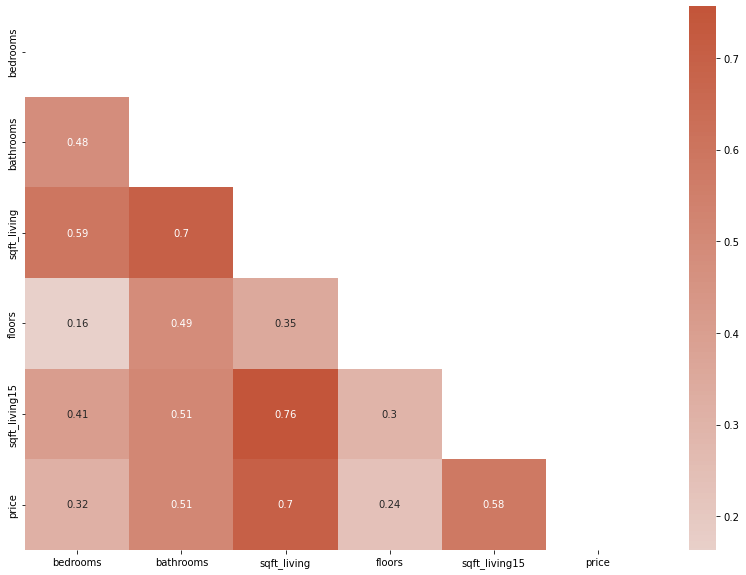

In [44]:
#Heatmap
import matplotlib.pyplot as plt 
import seaborn as sns

mask=np.zeros_like(corre_matrix)
mask[np.triu_indices_from(mask)]=True
fig,ax = plt.subplots(figsize=(14,10))
ax=sns.heatmap(corre_matrix, mask=mask, center=0, cmap=sns.diverging_palette(220, 20, as_cmap=True), annot=True,);

In [45]:
X_num=df[['bedrooms','bathrooms','floors','sqft_living']]

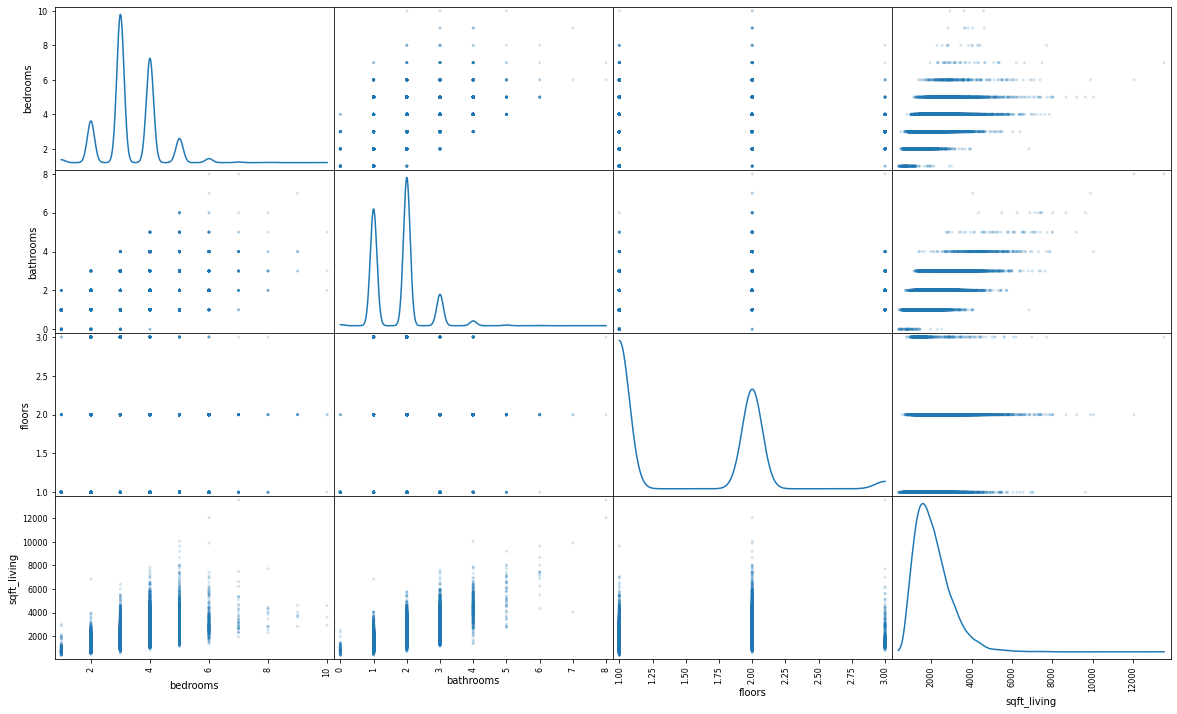

In [46]:
from pandas.plotting import scatter_matrix
scatter_matrix(X_num,alpha=0.2, figsize=(20,12), diagonal='kde');

## Chi squared 

In [47]:
feat_crosstab=pd.crosstab(df['condition'],df['grade'], margins=False)
feat_crosstab

grade,3,4,5,6,7,8,9,10,11,12,13
condition,,,,,,,,,,,
1,0,1,8,11,6,2,0,0,0,0,0
2,0,4,13,56,72,13,2,2,0,0,0
3,0,12,96,1006,5171,4248,2034,919,330,72,11
4,0,10,83,675,2815,1389,445,156,55,13,2
5,1,0,34,247,824,389,125,53,11,3,0


In [48]:
from scipy.stats import chi2_contingency 
chi2_contingency(feat_crosstab, correction=False)

(1410.2311695772948,
 6.544693555325971e-270,
 40,
 array([[1.30725057e-03, 3.52957654e-02, 3.05896634e-01, 2.60796489e+00,
         1.16188431e+01, 7.89710070e+00, 3.40669499e+00, 1.47719315e+00,
         5.17671226e-01, 1.15038050e-01, 1.69942574e-02],
        [7.56337831e-03, 2.04211214e-01, 1.76983052e+00, 1.50889397e+01,
         6.72233064e+01, 4.56903684e+01, 1.97101639e+01, 8.54661749e+00,
         2.99509781e+00, 6.65577291e-01, 9.83239180e-02],
        [6.48909846e-01, 1.75205659e+01, 1.51844904e+02, 1.29457514e+03,
         5.76751071e+03, 3.92006438e+03, 1.69105906e+03, 7.33268126e+02,
         2.56968299e+02, 5.71040665e+01, 8.43582800e+00],
        [2.63457678e-01, 7.11335730e+00, 6.16490966e+01, 5.25598067e+02,
         2.34161184e+03, 1.59154783e+03, 6.86570708e+02, 2.97707176e+02,
         1.04329240e+02, 2.31842756e+01, 3.42494981e+00],
        [7.87618470e-02, 2.12656987e+00, 1.84302722e+01, 1.57129885e+02,
         7.00035296e+02, 4.75800317e+02, 2.05253373e+02, 8.9

In [49]:
feat_crosstab=pd.crosstab(df['view'],df['grade'], margins=False)
feat_crosstab

grade,3,4,5,6,7,8,9,10,11,12,13
view,,,,,,,,,,,
0,1,24,221,1912,8465,5389,2151,855,240,42,5
1,0,2,2,15,94,109,63,26,18,2,0
2,0,1,6,42,220,325,189,102,59,13,3
3,0,0,1,14,78,145,130,84,44,9,2
4,0,0,4,12,31,73,73,63,35,22,3


In [50]:
chi2_contingency(feat_crosstab, correction=False)

(1785.856202479865,
 0.0,
 40,
 array([[9.01302582e-01, 2.43351697e+01, 2.10904804e+02, 1.79809865e+03,
         8.01077735e+03, 5.44476890e+03, 2.34879453e+03, 1.01847192e+03,
         3.56915822e+02, 7.93146272e+01, 1.17169336e+01],
        [1.54535693e-02, 4.17246370e-01, 3.61613521e+00, 3.08298707e+01,
         1.37351324e+02, 9.33550119e+01, 4.02720015e+01, 1.74625333e+01,
         6.11961343e+00, 1.35991409e+00, 2.00896400e-01],
        [4.48200196e-02, 1.21014053e+00, 1.04878846e+01, 8.94159391e+01,
         3.98360334e+02, 2.70757738e+02, 1.16800971e+02, 5.06466222e+01,
         1.77487278e+01, 3.94416173e+00, 5.82660255e-01],
        [2.36705729e-02, 6.39105467e-01, 5.53891405e+00, 4.72227928e+01,
         2.10384052e+02, 1.42993931e+02, 6.16855129e+01, 2.67477473e+01,
         9.37354685e+00, 2.08301041e+00, 3.07717447e-01],
        [1.47532565e-02, 3.98337924e-01, 3.45226201e+00, 2.94327466e+01,
         1.31126943e+02, 8.91244222e+01, 3.84469863e+01, 1.66711798e+01,
       

In [51]:
# checking the independent variables in front of the target variable (price) we can see some multicollinearity 
# between some of them, like sqft_above and sqft_living, or sqft_above and sqft_living15, or sqft_lot and sqft_living15.   

In [52]:
X_cat1=df[['condition','grade','view','waterfront']].astype(str)

In [53]:
X_cat1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21419 entries, 0 to 21418
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   condition   21419 non-null  object
 1   grade       21419 non-null  object
 2   view        21419 non-null  object
 3   waterfront  21419 non-null  object
dtypes: object(4)
memory usage: 669.5+ KB


In [54]:
X_dummies1=pd.get_dummies(X_cat1, drop_first=True)
X_dummies1.head(10)

,condition_2,condition_3,condition_4,condition_5,grade_11,grade_12,grade_13,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,view_1,view_2,view_3,view_4,waterfront_1
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [55]:
X_cat2=df[['zipcode']].astype(str)
X_cat2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21419 entries, 0 to 21418
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   zipcode  21419 non-null  object
dtypes: object(1)
memory usage: 167.5+ KB


In [56]:
X_dummies2=pd.get_dummies(X_cat2, drop_first=True)
X_dummies2.head(10)

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [57]:
X_dummies=pd.concat((X_dummies1,X_dummies2),axis=1)

In [58]:
X_num=df[['bedrooms','bathrooms','sqft_living','floors','sqft_living15']]

In [59]:
X_final=pd.concat((X_num,X_dummies),axis=1)

In [60]:
X_final.head(10)

,bedrooms,bathrooms,sqft_living,floors,sqft_living15,condition_2,condition_3,condition_4,condition_5,grade_11,grade_12,grade_13,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,view_1,view_2,view_3,view_4,waterfront_1,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,4,1,1450,1,1260,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,2,3310,2,2380,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,2,1940,1,2200,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,2,1630,2,1590,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,2,2600,1,2380,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,5,2,2820,2,2820,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,4,2,2820,2,1300,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,4,2,3630,1,2830,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,3,1,2330,1,2570,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,3,1,1710,1,2260,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [61]:
y = df['price']

## Train test split

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X_final,y,test_size=0.2,random_state=40)

## Linear regression model

In [64]:
from sklearn import linear_model

In [65]:
lm=linear_model.LinearRegression() #configure model
model=lm.fit(X_train,y_train)

In [66]:
preds=lm.predict(X_test)
preds

array([210972.63144349, 393470.73798013, 253160.38104739, ...,
       643911.70734528, 557382.07880449, 605972.66578839])

## Model Validation

In [67]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [68]:
r2_score(y_test,preds)

0.8169049435049932

In [69]:
mse=mean_squared_error(y_test, preds)
mse

20892453253.021324

In [70]:
rmse=np.sqrt(mse)
rmse

144542.21962119345

In [71]:
mean_absolute_error(y_test, preds)

89407.15650776224

# Scale all of X

In [72]:
sc_y = StandardScaler()
train_score = []
test_score =  []
for i in range(10):
    
    X_train,X_test,y_train,y_test=train_test_split(X_final,y,test_size=0.2,random_state=40)
    
    y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
    pipe_lr.fit(X_train, y_train_std)
    
    y_train_pred = sc_y.inverse_transform(pipe_lr.predict(X_train))
    
    y_test_pred = sc_y.inverse_transform(pipe_lr.predict(X_test))
    
    train_score = np.append(train_score, r2_score(y_train, 
                            y_train_pred))
    
    test_score = np.append(test_score, r2_score(y_test, 
                            y_test_pred))

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn import linear_model

classifiers = ['RandomForestRegressor', 'KNeighborsRegressor','GradientBoostingRegressor', 'linear_model']
models = [
          RandomForestRegressor(n_estimators=200, random_state=0),
          KNeighborsRegressor(),
          GradientBoostingRegressor(random_state=0), linear_model.LinearRegression(),
         ]
for i in models:
    model = i
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    print(model,'accuracy:',r2_score(y_test,preds))

RandomForestRegressor(n_estimators=200, random_state=0) accuracy: 0.7865880143332411
KNeighborsRegressor() accuracy: 0.41686516043515476
GradientBoostingRegressor(random_state=0) accuracy: 0.7652287097806367
LinearRegression() accuracy: 0.8169049435049932


In [74]:
train_score

array([0.57935387, 0.58145193, 0.57852851, 0.57915449, 0.57882254,
       0.57856576, 0.57772549, 0.57727907, 0.5792681 , 0.57840172])

In [75]:
test_score

array([0.56478061, 0.56692216, 0.56235836, 0.56394661, 0.56349019,
       0.56286739, 0.56397395, 0.56323223, 0.56352733, 0.56370863])

In [76]:
def maxmin_scaler (X):
    from sklearn.preprocessing import MinMaxScaler
    X_scaled = MinMaxScaler().fit(X).transform(X)
    
    return X_scaled

def abs_scaler (X):
    from sklearn.preprocessing import MaxAbsScaler
    df = MaxAbsScaler().fit(X).transform(X)
    df = pd.DataFrame(df, index=X.index, columns=X.columns)
    return df

def st_scaler (X):
    from sklearn.preprocessing import StandardScaler
    df = StandardScaler().fit(X).transform(X)
    df = pd.DataFrame(df, index=X.index, columns=X.columns)
    return df

def rob_scaler (X):
    from sklearn.preprocessing import RobustScaler
    df = RobustScaler().fit(X).transform(X)
    df = pd.DataFrame(df, index=X.index, columns=X.columns)
    return df



## Min Max Scaler

In [77]:
X_scaled=maxmin_scaler(X_num)

In [78]:
#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler()
#X_scaled=scaler.fit_transform(X_num)
#X_scaled

In [79]:
X_scaled_df=pd.DataFrame(X_scaled, columns=X_num.columns)

In [80]:
X_scaled_df.describe()

,bedrooms,bathrooms,sqft_living,floors,sqft_living15
count,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000
mean,0.263577,0.219070,0.130075,0.223983,0.273518
std,0.100168,0.091748,0.069765,0.276055,0.117973
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.125000,0.080486,0.000000,0.187747
50%,0.222222,0.250000,0.117692,0.000000,0.247978
75%,0.333333,0.250000,0.165528,0.500000,0.339184
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
X_scaled_concat=pd.concat((X_scaled_df,X_dummies),axis=1)

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled_concat,y,test_size=0.2,random_state=40)

In [83]:
lm=linear_model.LinearRegression() #configure model
model=lm.fit(X_train,y_train)

In [84]:
preds=lm.predict(X_test)
preds

array([210972.63144371, 393470.73798006, 253160.38104779, ...,
       643911.70734512, 557382.07880426, 605972.66578806])

In [85]:
r2_score(y_test,preds)

0.8169049435049881

In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn import linear_model

classifiers = ['RandomForestRegressor', 'KNeighborsRegressor','GradientBoostingRegressor', 'linear_model']
models = [
          RandomForestRegressor(n_estimators=200, random_state=0),
          KNeighborsRegressor(),
          GradientBoostingRegressor(random_state=0), linear_model.LinearRegression(),
         ]
for i in models:
    model = i
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    print(model,'accuracy:',r2_score(y_test,preds))

RandomForestRegressor(n_estimators=200, random_state=0) accuracy: 0.786697961247324
KNeighborsRegressor() accuracy: 0.7808139064129804
GradientBoostingRegressor(random_state=0) accuracy: 0.765242870861657
LinearRegression() accuracy: 0.8169049435049881


## StandardScaler

In [87]:
X_scaled=st_scaler(X_num)

In [88]:
X_scaled_df=pd.DataFrame(X_scaled, columns=X_num.columns)

In [89]:
X_scaled_df.describe()

,bedrooms,bathrooms,sqft_living,floors,sqft_living15
count,2.141900e+04,2.141900e+04,2.141900e+04,2.141900e+04,2.141900e+04
mean,8.465198e-16,-3.870606e-15,-1.298845e-16,3.808072e-15,1.072773e-16
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-2.631414e+00,-2.387789e+00,-1.864512e+00,-8.113908e-01,-2.318527e+00
25%,-4.128642e-01,-1.025328e+00,-7.108174e-01,-8.113908e-01,-7.270484e-01
50%,-4.128642e-01,3.371326e-01,-1.775056e-01,-8.113908e-01,-2.164916e-01
75%,6.964106e-01,3.371326e-01,5.081811e-01,9.998837e-01,5.566373e-01
max,7.352059e+00,8.511898e+00,1.246960e+01,2.811158e+00,6.158175e+00


In [90]:
X_scaled_concat=pd.concat((X_scaled_df,X_dummies),axis=1)

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled_concat,y,test_size=0.2,random_state=40)

In [92]:
lm=linear_model.LinearRegression() #configure model
model=lm.fit(X_train,y_train)

In [93]:
preds=lm.predict(X_test)
preds

array([210972.6314437 , 393470.73798006, 253160.38104778, ...,
       643911.70734512, 557382.07880426, 605972.66578806])

In [94]:
r2_score(y_test,preds)

0.8169049435049882

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn import linear_model

classifiers = ['RandomForestRegressor', 'KNeighborsRegressor','GradientBoostingRegressor', 'linear_model']
models = [
          RandomForestRegressor(n_estimators=200, random_state=0),
          KNeighborsRegressor(),
          GradientBoostingRegressor(random_state=0), linear_model.LinearRegression(),
         ]
for i in models:
    model = i
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    print(model,'accuracy:',r2_score(y_test,preds))

## RobustScaler

In [ ]:
X_scaled=rob_scaler(X_num)

In [ ]:
X_scaled_df=pd.DataFrame(X_scaled, columns=X_num.columns)

In [ ]:
X_scaled_df.describe()

In [ ]:
X_scaled_concat=pd.concat((X_scaled_df,X_dummies),axis=1)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled_concat,y,test_size=0.2,random_state=40)

In [ ]:
lm=linear_model.LinearRegression() #configure model
model=lm.fit(X_train,y_train)

In [ ]:
preds=lm.predict(X_test)
preds

In [ ]:
r2_score(y_test,preds)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn import linear_model

classifiers = ['RandomForestRegressor', 'KNeighborsRegressor','GradientBoostingRegressor', 'linear_model']
models = [
          RandomForestRegressor(n_estimators=200, random_state=0),
          KNeighborsRegressor(),
          GradientBoostingRegressor(random_state=0), linear_model.LinearRegression(),
         ]
for i in models:
    model = i
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    print(model,'accuracy:',r2_score(y_test,preds))

# MODEL 2 - Setting distance to center as dummie

In [ ]:
df3=pd.read_excel('regression_data_distance.xls')
pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)
df3.head()

In [ ]:
df3.info()

In [ ]:
df.drop(df.loc[df['bedrooms']==11].index, inplace=True)
df['bedrooms'] = df['bedrooms'].replace(33,3)

In [ ]:
df3=df3.drop_duplicates( subset=['id','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade', 'sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15', 'sqft_lot15'],keep='last')

In [ ]:
df3['bathrooms']=df3['bathrooms'].astype(int) 
df3['floors']=df3['floors'].astype(int)

In [ ]:
df3=df3.drop(['id'],axis=1)
df3.reset_index(drop=True, inplace=True)

In [ ]:
X_cat3=df3[['condition','grade','view','waterfront','distance_to_center']].astype(str)
X_cat3.info()

In [ ]:
X_dummies10=pd.get_dummies(X_cat3, drop_first=True)
X_dummies10.head(10)

In [ ]:
X_num2=df[['bedrooms','bathrooms','sqft_living','floors','sqft_living15']]

In [ ]:
X_final2=pd.concat((X_num2,X_dummies10),axis=1)

In [ ]:
X_final2.head(10)

In [ ]:
y2 = df3['price']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_final2,y2,test_size=0.2,random_state=40)

In [ ]:
lm=linear_model.LinearRegression() #configure model
model=lm.fit(X_train,y_train)

In [ ]:
preds2=lm.predict(X_test)
preds2

In [ ]:
r2_score(y_test,preds2)

In [ ]:
mse=mean_squared_error(y_test, preds2)
mse

In [ ]:
rmse=np.sqrt(mse)
rmse

In [ ]:
mean_absolute_error(y_test, preds2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn import linear_model

classifiers = ['RandomForestRegressor', 'KNeighborsRegressor','GradientBoostingRegressor', 'linear_model']
models = [
          RandomForestRegressor(n_estimators=200, random_state=0),
          KNeighborsRegressor(),
          GradientBoostingRegressor(random_state=0), linear_model.LinearRegression(),
         ]
for i in models:
    model = i
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    print(model,'accuracy:',r2_score(y_test,preds))

In [ ]:
def get_plot_predict(y_test, preds):
    plt.figure(figsize=(15, 5))

    ax1 = sns.distplot(y_test, hist=False, color="orange", label="real value")
    ax2 = sns.distplot(preds, hist=False, color="blue", label="predict value", ax=ax1)

    plt.title("Real sales price x predict")
    plt.xlabel("SalesPrice")
    plt.gca().legend()
    plt.grid()
    plt.show()

In [ ]:
# TESTING-ADAPTING

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict

classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
y_pred = cross_val_predict(classifier_pipeline, X_final, y, cv=5)

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs1 = SFS(classifier_pipeline,
            k_features=1,
            forward=False,
            scoring='neg_mean_squared_error',
            cv=5)
sfs1.fit(X_final,y)
sfs1.subsets_

In [ ]:
df.var()